<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

---

## Contents:
- [1. Problem Statement](#1.-Problem-Statement)
- [2. Data Import and Cleaning](#2.-Data-Import-and-Cleaning)
- [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
- [4. Preprocessing and Feature Engineering](#4.-Preprocessing-and-Feature-Engineering)
- [5. Modelling](#5.-Modelling)
- [6. Conclusions and Recommendations](#6.-Conclusions-and-Recommendations)
---

## 1. Problem Statement

I am an employee of a real estate agency in Ames, Iowa who has been tasked with doing market research for the company to find out the features of a house that are the strongest predictors of the sale price of the house and the magnitude to which these features affect the sale price of the house. 
This information can help our company’s agents determine a fair price range for each house and highlight the strongest features of each house they sell in order to maximise selling price for our customers. 

Some points to note:
- Without time/resources/expertise to understand everything about a house, the customer is unable to ascertain his own valuation perfectly.
- Because a customer’s resources are limited, our agents assist the price discovery process such that the customer is able to arrive at a satisfactory valuation. 
- If we are able to highlight features that increase the perceived value and “downplay” features that decrease perceived value - then the price discovered by the customer will be higher than if he had total information about the house (which is impossible in reality).
- This means that we are able to extract additional value from the customer by tilting the price discovery process in our favor. 


### 1.1 Executive Summary

The goal of this project is to accurately predict the sale price of a residential property in Ames, Iowa by utilizing linear regression models. The datasets I used (https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data) contain details of over 2,500 residential properties sold in Ames between 2006 and 2010. They also have 81 columns which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers); 79 of which are the different features of a home. More details of the datasets can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

I started by importing and cleaning the datasets, and made sure that data types for each feature were accurate. I then identified and gave appropriate treatment to the null values.

Next, I explored the relationship between the features and sale price by looking for possible trends as well as collinearity. I created histograms and scatter plots for the numerical features and bar charts for the categorical features. Distributions for many numeric features were right skewed and also had a positive relationship with sale price, especially the features related to square footage. I also noticed that several of the categorical features also had a positive relationship with sale price. 

I then encoded the nominal variables using one-hot encoding and the ordinal variables using ordinal encoding. Columns of both datasets were mismatched as a result and I made sure to sync them up before moving on to create interacion columns

After scaling the data and fitting it, I began to build several linear regression models, namely Linear, Ridge, LASSO and ElasticNet regression, to predict the sale price of a home. The best model would have the lowest root mean squared error (RSME) and highest R2 score for the training and test data. 

I chose the Lasso Regression Model because of it gave the best testing R2 score and RSME. Its training R2 score and RSME was slightly lower but comparable to the other models. It was also the model with the least amount of overfit. You can find the Kaggle scores below:

- Private Score (30% of test date): 21370.23
- Public score (70% of test date): 24113.54

---

### 1.2 Data Used During Analysis

* [`train.csv`](./datasets/train.csv): Dataset used to train our regression model
* [`test.csv`](./datasets/test.csv): Dataset used to test the effectiveness of our regression model


---

## 2. Data Import and Cleaning

In [1]:
# Standard Imports
import numpy as np # for mathematical computations
import pandas as pd # for data procesing, analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

# Modeling Imports - Linear Regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer

In [2]:
# Setting display range to show all columns and more rows
pd.options.display.max_columns = 300
pd.options.display.max_rows = 90

In [3]:
# Loading datasets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [4]:
# Getting a first look at the train dataset
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Checking for missing values and data types in all columns in train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# Summary statistics for train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
# Getting a first look at the test dataset
print(test.shape)
test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
# Checking for missing values and data types in all columns in test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [9]:
# Summary statistics for test
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


- Looking at the number of rows in both the `train` and `test` dataset, we can conclude that it is a 70/30 split of the original dataset. 
- There is also one less column in the `test` dataset, which makes sense as it is what we are trying to predict. 
- Columns need to be better named for convenience.
- Data type for `MS SubClass` is wrong, it is supposed to be categorical. Hence, we will be changing it from int64 to object
- We should also group the numerical and categorical features into two seperate lists for easy access during EDA.

In [10]:
# Renaming all columns in both datasets appropriately
train.columns = [i.lower().replace(' ','_') for i in train.columns]
test.columns = [i.lower().replace(' ','_') for i in test.columns]

In [11]:
# Converting data type of ms_subclass column
train['ms_subclass'] = train['ms_subclass'].astype('object')
test['ms_subclass'] = test['ms_subclass'].astype('object')

In [12]:
# Segregating numerical and catergorical features into two lists
num_list = train.select_dtypes(include=np.number).columns.tolist()
cat_list = train.select_dtypes(include=object).columns.tolist()

---
### 2.1 Handling Null Values

In [13]:
# Checking for null values in the train dataset
train.isnull().sum()[train.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

- 

In [14]:
# Checking for null values in the 'test' dataset
test.isnull().sum()[test.isnull().sum()>0]

lot_frontage      160
alley             820
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
dtype: int64

There are a significant number of null values in the datesets, but most of them indicate the absence of a feature in the respective properties. They are not considered as missing values and we will not be dropping them. Null values in numeric columns will be set to `0`, and those in categorical columns will be set to `None`.

In [15]:
# Replacing null values in respective columns in the train dataaset
for col in train:
    if type(train[col]) =='int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500


In [16]:
# Replacing null values in respective columns in the test dataaset
for col in test:
    if type(test[col]) == 'int64' or 'float64':
        test[col] = test[col].fillna(value=0)
    else:
        test[col] = test[col].fillna(value='None')
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD


In [17]:
print(f'There are {train.isnull().sum().sum()} null values left in the train dataset.')
print(f'There are {test.isnull().sum().sum()} null values left in the test dataset.')

There are 0 null values left in the train dataset.
There are 0 null values left in the test dataset.


---
## 3. Exploratory Data Analysis



### 3.1 Numeric Features

First, let us plot a heatmap to give us an overview on how different features correlate with one another.

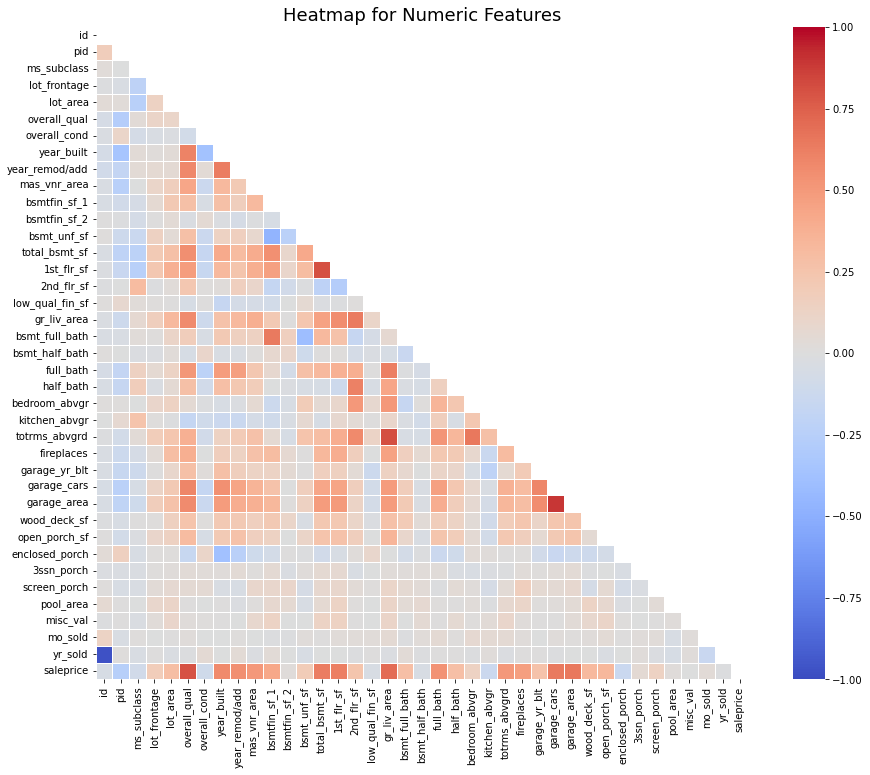

In [18]:
# Heatmap of numeric features
plt.figure(figsize=(16,12))
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(train.corr(), cmap='coolwarm', mask = mask, square = True, vmin = -1, vmax = 1, linewidths = .5)
plt.title('Heatmap for Numeric Features', fontsize=18);

There are 4 obvious standouts with high correlaton:
1. `overall_qual` and `saleprice`
2. `garage_area` and `garage_cars`
3. `totrms_abvgrd` and `gr_liv_area`
4. `1st_fl_sf` and `total_bsmt_sf`

All the above strongly correlated features follow basic logic. For example, the bigger the garage, the more cars you can fit in it.

Next we will explore the correlation between the numeric features and our target variable, `saleprice`

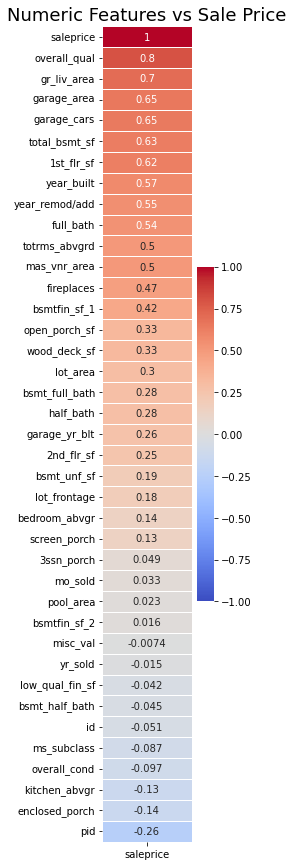

In [19]:
# Heatmap of features vs sales price in descending order
plt.figure(figsize = (2,15))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='coolwarm');
plt.title('Numeric Features vs Sale Price', fontsize=18);

As mentioned above, `overall_qual` is as the top of this list. `garage_area` and `garage_cars` haven similar weights, and its the same for `1st_fl_sf` and `total_bsmt_sf`

2 interesting observations
- `totrms_abvgrd` and `gr_liv_area` have a difference of 0.2 even though they are high correlated to one another.
- `overall_cond` has a very slight negative correlation with `saleprice`, it defies logic as one would assume a residential property with a better rating for overall condition would be able to fetch a higher sale price.

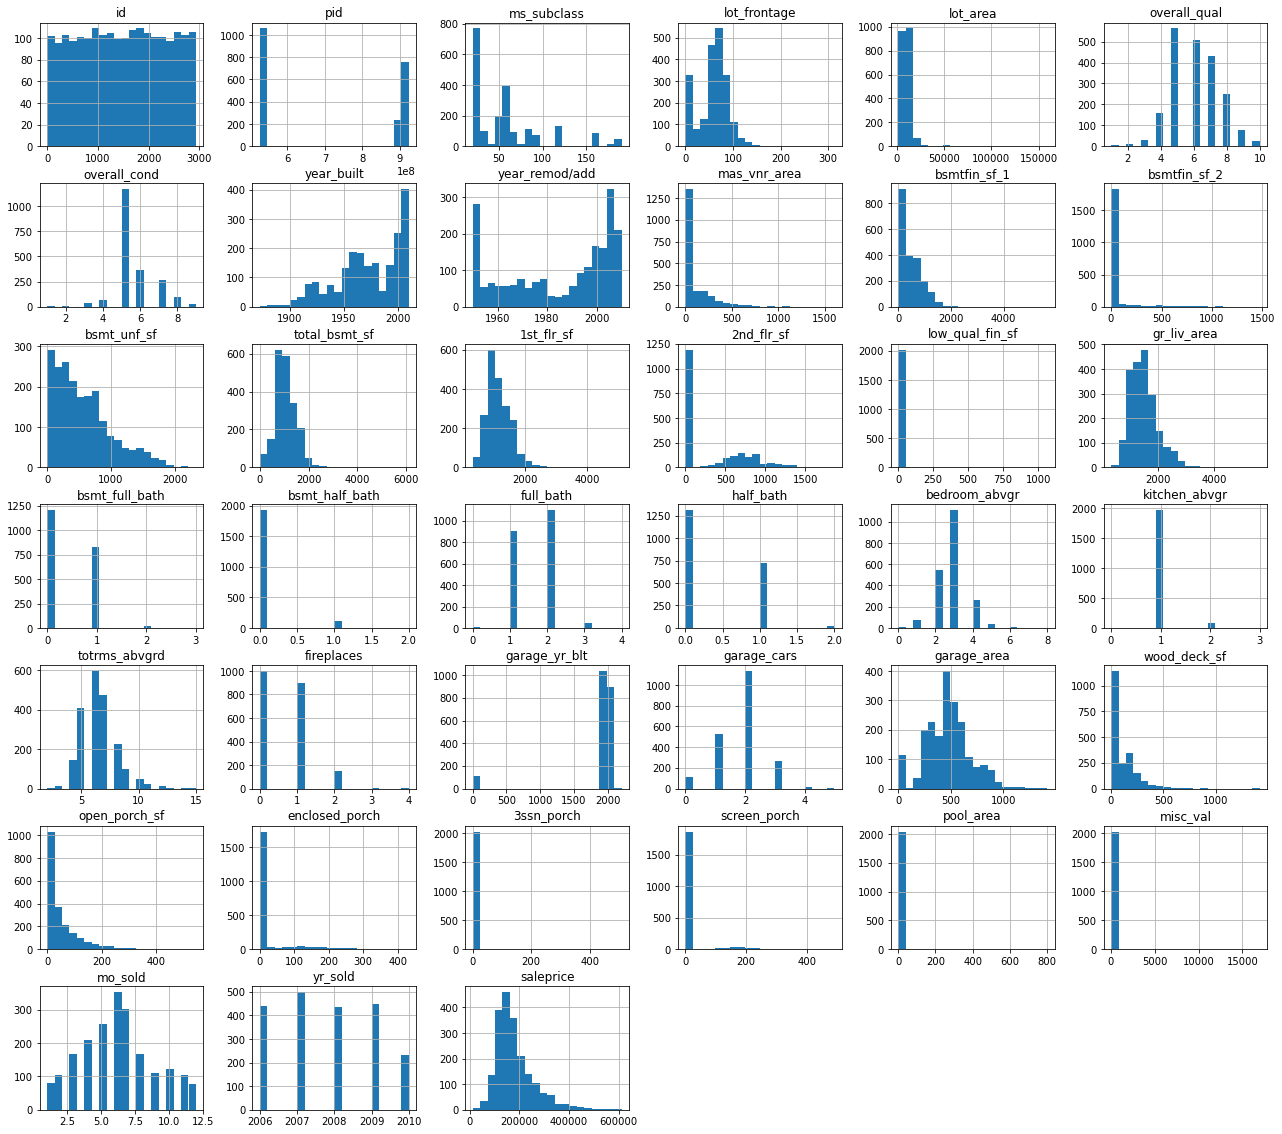

In [20]:
# Creating histograms to observe the distributions of individual features
train.hist(figsize=(22, 20),bins = 20);

- There are many numeric features with distributions that are skewed to the right.
- This includes saleprice, our target variable.
- Only features relating to `year` are somewhat left skewed

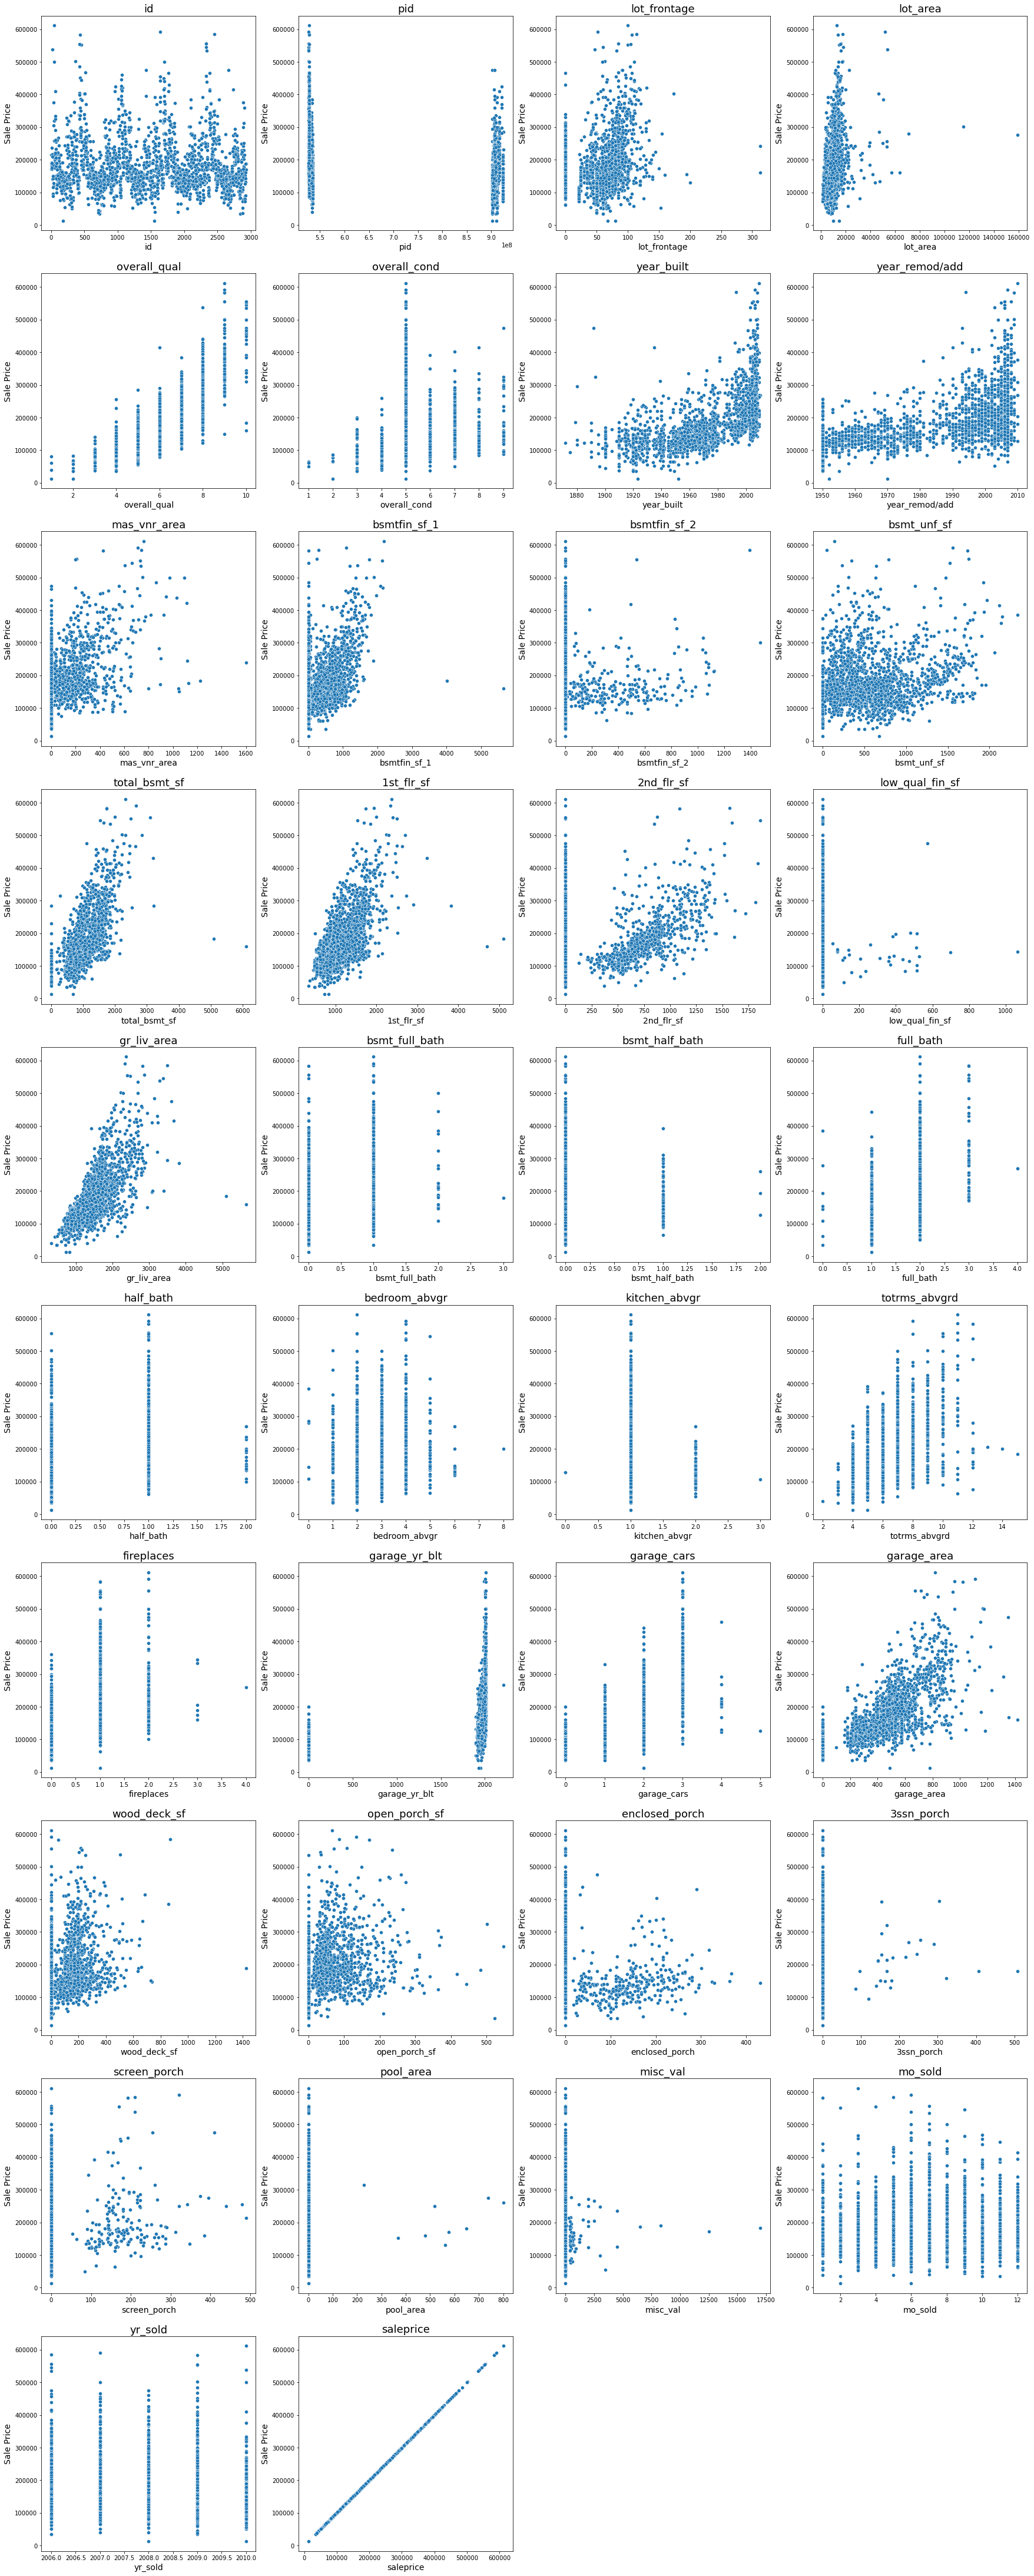

In [21]:
# Creating scatterplots for each numeric feature vs sale price
def create_scatterplots(column_list):
    fig = plt.figure(figsize = (30, 200))  
    count = 0                                          
    for column in column_list:
        count += 1                                     
        ax = fig.add_subplot(25, 4, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 14)
        plt.xlabel(column, size = 14)
        plt.xticks(size = 10)
        sns.scatterplot(x = column, y = "saleprice", data = train, sizes = (10,10))
create_scatterplots(num_list)

Many of the features have a strong positive relationship with sales price, including most of the square footage and age features. This follows logic as generally, the larger the area or the younger the age of a house, the higher the sale price will be.

We can also see that there are some obvious outliers in a few of the plots like `lot_area` and `garage_yr_blt`. We will determine whether to remove them as they might negatively affect training process later on.

#### 3.1.1 Target Variable: Sales Price

In [22]:
train[['saleprice']].describe().T

,count,mean,std,min,25%,50%,75%,max
saleprice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


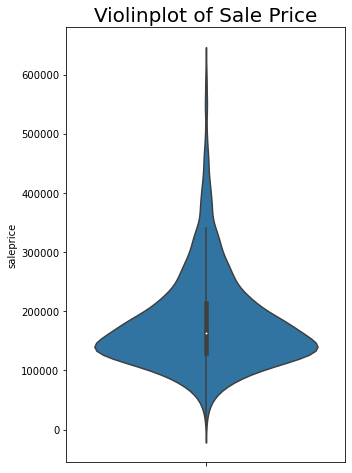

In [23]:
#Violinplot of Sale Price
plt.figure(figsize= (5,8))
sns.violinplot(y=train['saleprice'])
plt.xticks(size = 15)
plt.title('Violinplot of Sale Price', size = 20);

- Sale prices have a right skewed distribution. 
- The mean, median and mode are all in the bottom half of the plot. 
- There is a high frequency of houses sold around the 100,000 and 200,000 range.  
- The top half of the violin plot consists of residential properties with sale prices above the 75th percentile.

### 3.2 Categorical Features

Next, I will create bar plots for the different catergorical features against their mean sale prices

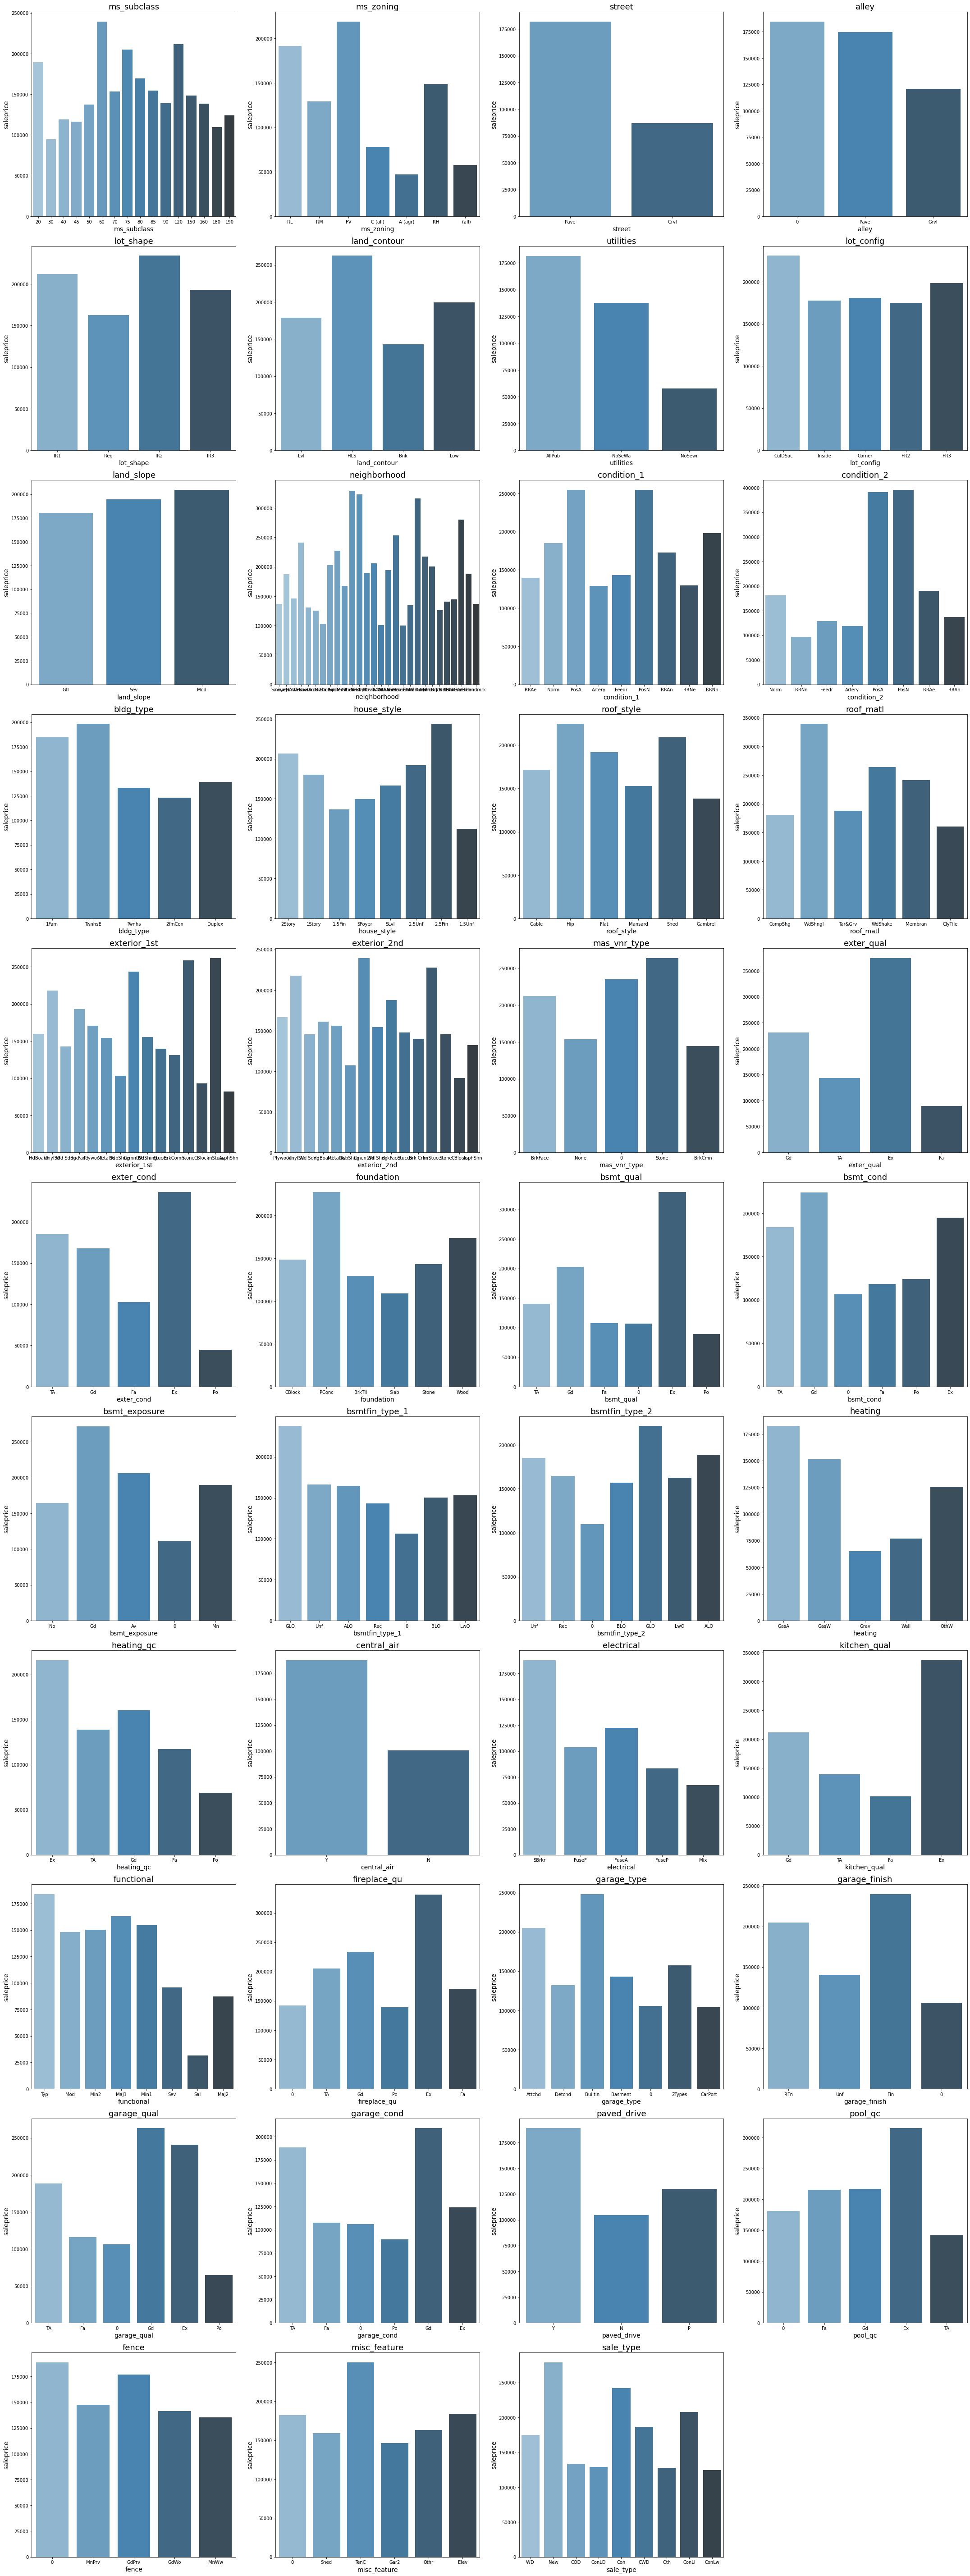

In [24]:
# Creating barplots for each numeric feature vs mean sale price
def create_barplots(column_list):
    fig = plt.figure(figsize = (30, 180))  
    count = 0                                          
    for column in column_list:
        count += 1                                     
        ax = fig.add_subplot(25, 4, count)
        plt.title(column, size = 18)
        plt.ylabel("Sale Price", size = 14)
        plt.xlabel(column, size = 14)
        plt.xticks(size = 10)
        sns.barplot(x = column, y = "saleprice", data = train, palette = 'Blues_d', ci = 0)
        plt.tight_layout();
        
create_barplots(cat_list)

- Only some features have a positive relationship with sale prices
- The more obvious ones are `central_air`, `street` and the quality and condition of various areas of the properties like the `bsmt` and `kitchen`.
- Features relating to the location and type of property like `ms_subclass`, `ms_zoning` and `neighborhood` have differing effects on mean prices as well.

### 3.3 Identifying Outliers

From the scatter plots, we can see that there are a few columns with obvious outliers. We should investigate further to determine their treatment.

In [25]:
# Identifying outlier in 'garage_yr_blt' column
sorted(train['garage_yr_blt'].unique())[-5:]

[2007.0, 2008.0, 2009.0, 2010.0, 2207.0]

In [26]:
# Identifying row with 'garage_yr_blt' value of 2207.0
train.loc[train['garage_yr_blt']==2207.0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,0,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,0,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0,0,0,0,9,2007,New,267300


We can safely assume that it is an input error, as the only possible value is 2007.

In [27]:
# Replacing erroreous value with most probable value
train.loc[1699,['garage_yr_blt']]=[2007.0]

Next, we can remove all the large and obvious outliers from our dataset.

In [28]:
train.shape

(2051, 81)

In [29]:
# Dropping rows with lot_frontage above 250
train = train[train['lot_frontage'] < 250]

# Dropping rows with lot_area above 100000
train = train[train['lot_area'] < 100000]

# Dropping rows with mas_vnr_area above 1400
train = train[train['mas_vnr_area'] < 1400]

# Dropping rows with bsmtfin_sf_1 above 3000
train = train[train['bsmtfin_sf_1'] < 3000]

# Dropping rows with bsmtfin_sf_2 above 1300
train = train[train['bsmtfin_sf_2'] < 1300]

# Dropping rows with total_bsmt_sf above 4000
train = train[train['total_bsmt_sf'] < 4000]

# Dropping rows with low_qual_fin_sf above 1000
train = train[train['low_qual_fin_sf'] < 1000]

# Dropping rows with gr_liv_area above 4500
train = train[train['gr_liv_area'] < 4500]

# Dropping rows with 1st_floor_sf above 3500
train = train[train['1st_flr_sf'] < 3500]

# Dropping rows with wood_deck_sf above 1200
train = train[train['wood_deck_sf'] < 1200]

In [30]:
train.shape

(2040, 81)

11 rows with large outliers were dropped

### 3.4 Summary

From the datasets used, we can ascertain that there are linear relationships between most features and our target variable. Hence, these datasets are suitable to answer our problem statement as we are trying to find out the strongest predictors of the sale price of the house and the magnitude to which these features affect it.

---
## 4. Preprocessing and Feature Engineering

### 4.1 Encoding Categorical Variables

#### 4.1.1 One-Hot Encoding

Nominal variables can be one-hot encoded as they do not contain different ranks

In [31]:
# Creating a list of features which contain nominal variables
nom_list = ['ms_subclass',
            'ms_zoning', 
            'street',
            'alley',
            'land_contour', 
            'lot_config',
            'neighborhood',
            'condition_1', 
            'condition_2', 
            'bldg_type',
            'house_style',
            'roof_style',
            'roof_matl',
            'exterior_1st',
            'exterior_2nd',
            'mas_vnr_type',
            'foundation',
            'heating', 
            'central_air', 
            'garage_type',
            'misc_feature',
            'sale_type']

In [32]:
# Creating dummy columns
train = pd.get_dummies(data = train, columns = nom_list, drop_first = True)
test = pd.get_dummies(data = test, columns = nom_list, drop_first = True)

#### 4.1.2 Ordinal Encoding

We will utilise ordinal encoding for the ordinal categories to retain their ranks in the dataset.

In [33]:
#List of features with the same categories
same_cat = ['fireplace_qu',
            'garage_qual',
            'garage_cond',
            'bsmt_qual',
            'bsmt_cond',
            'exter_qual',
            'exter_cond',
            'heating_qc',
            'kitchen_qual']

In [34]:
# Creating dictionary of categories
cat_dict = {0: 0, 
            'Po': 1,
            'Fa': 2,
            'TA': 3,
            'Gd': 4,
            'Ex': 5}

In [35]:
# Mapping the dictionary to the features
for col in same_cat:
    train[col] = train[col].map(cat_dict)
    test[col] = test[col].map(cat_dict)

In [36]:
# Creating a list of features which contain ordinal variable
ord_list = [ 'fence']       

In [37]:
# Ordinal encoding for lot_shape

train['lot_shape'] = train['lot_shape'].map({'IR3': 1, 'IR2': 2,'IR1': 3,'Reg': 4})
test['lot_shape'] = test['lot_shape'].map({'IR3': 1, 'IR2': 2,'IR1': 3,'Reg': 4})

In [38]:
# Ordinal encoding for utilities

train['utilities'] = train['utilities'].map({'ELO': 1, 'NoSeWa': 2,'NoSewr': 3,'AllPub': 4})
test['utilities'] = test['utilities'].map({'ELO': 1, 'NoSeWa': 2,'NoSewr': 3,'AllPub': 4})

In [39]:
# Ordinal encoding for land_slope

train['land_slope'] = train['land_slope'].map({'Sev': 1, 'Mod': 2,'Gtl': 3})
test['land_slope'] = test['land_slope'].map({'Sev': 1, 'Mod': 2,'Gtl': 3})

In [40]:
# Ordinal encoding for bsmt_exposure

train['bsmt_exposure'] = train['bsmt_exposure'].map({'None': 0, 'No': 1,'Mn': 2,'Av': 3,'Gd': 4})
test['bsmt_exposure'] = test['bsmt_exposure'].map({'None': 0, 'No': 1,'Mn': 2,'Av': 3,'Gd': 4})

In [41]:
# Ordinal encoding for bsmtfin types 1 and 2

train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({'None': 0, 'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({'None': 0, 'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})

train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({'None': 0, 'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({'None': 0, 'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})

In [42]:
# Ordinal encoding for electrical

train['electrical'] = train['electrical'].map({'None': 0, 'Mix': 1,'FuseP': 2,'FuseF': 3,'FuseA': 4,'SBrkr': 5})
test['electrical'] = test['electrical'].map({'None': 0, 'Mix': 1,'FuseP': 2,'FuseF': 3,'FuseA': 4,'SBrkr': 5})

In [43]:
# Ordinal encoding for functional

train['functional'] = train['functional'].map({'Sal': 0, 'Sev': 1,'Maj2': 2,'Maj1': 3,'Mod': 4,'Min2': 5,'Min1': 6,'Typ': 7})
test['functional'] = test['functional'].map({'Sal': 0, 'Sev': 1,'Maj2': 2,'Maj1': 3,'Mod': 4,'Min2': 5,'Min1': 6,'Typ': 7})

In [44]:
# Ordinal encoding for paved_drive

train['paved_drive'] = train['paved_drive'].map({'N': 0, 'P': 1, 'Y': 2})
test['paved_drive'] = test['paved_drive'].map({'N': 0, 'P': 1,'Y': 2})

In [45]:
# Ordinal encoding for garage_finish

train['garage_finish'] = train['garage_finish'].map({'None': 0, 'Unf': 1, 'RFn': 2,'Fin': 3})
test['garage_finish'] = test['garage_finish'].map({'None': 0, 'Unf': 1, 'RFn': 2,'Fin': 3})

In [46]:
# Ordinal encoding for pool_qc

train['pool_qc'] = train['pool_qc'].map({'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
test['pool_qc'] = test['pool_qc'].map({'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [47]:
# Ordinal encoding for fence

train['fence'] = train['fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
test['fence'] = test['fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

In [48]:
print(train.shape)
print(test.shape)

(2040, 212)
(878, 202)


#### 4.1.3 Syncing Columns

As seen above, there is now a 10 column difference between both datasets. We can use set subtraction to get the missing columns. 

In [49]:
# Finding out which columns are missing from the test dataset
train_only = set(train.columns) - set(test.columns)
print(train_only)

{'condition_2_RRAe', 'exterior_1st_Stone', 'roof_matl_Membran', 'condition_2_RRNn', 'exterior_2nd_Stone', 'ms_subclass_150', 'condition_2_Feedr', 'heating_Wall', 'exterior_1st_CBlock', 'neighborhood_GrnHill', 'ms_zoning_C (all)', 'exterior_1st_ImStucc', 'saleprice', 'condition_2_PosN', 'heating_OthW', 'neighborhood_Landmrk', 'condition_2_RRAn', 'misc_feature_TenC'}


In [50]:
# Finding out which columns are missing from the train dataset
test_only = set(test.columns) - set(train.columns)
print(test_only)

{'exterior_2nd_PreCast', 'mas_vnr_type_CBlock', 'heating_GasA', 'roof_matl_Metal', 'exterior_1st_PreCast', 'exterior_2nd_Other', 'sale_type_VWD', 'roof_matl_Roll'}


In [51]:
# Dropping saleprice from train_only set
train_only.remove('saleprice')

Next, we will add the missing columns back to both datasets while filling the values of the respective columns to 0.

In [52]:
# Adding the missing columns to the dataframes
for test_col in test_only:
    train[test_col] = 0
for train_col in train_only:
    test[train_col] = 0

In [53]:
# Syncing up the column order of both datasets
test = test[train.columns.drop('saleprice')]

In [54]:
print(train.shape)
print(test.shape)

(2040, 220)
(878, 219)


There is now a 1 column difference between the 2 datasets, which is our target variable, `saleprice`.

### 4.2 Interaction Columns

In [55]:
# Deriving the age of the property at the point of the sale
train['age_at_sale'] = train['yr_sold'] - train['year_built']
test['age_at_sale'] = test['yr_sold'] - test['year_built']

In [56]:
# Creating interaction column for the top 2 correlated features with saleprice

train['overall_qual*gr_liv_area'] = train['overall_qual'] * train['gr_liv_area']
test['overall_qual*gr_liv_area'] = test['overall_qual'] * test['gr_liv_area']

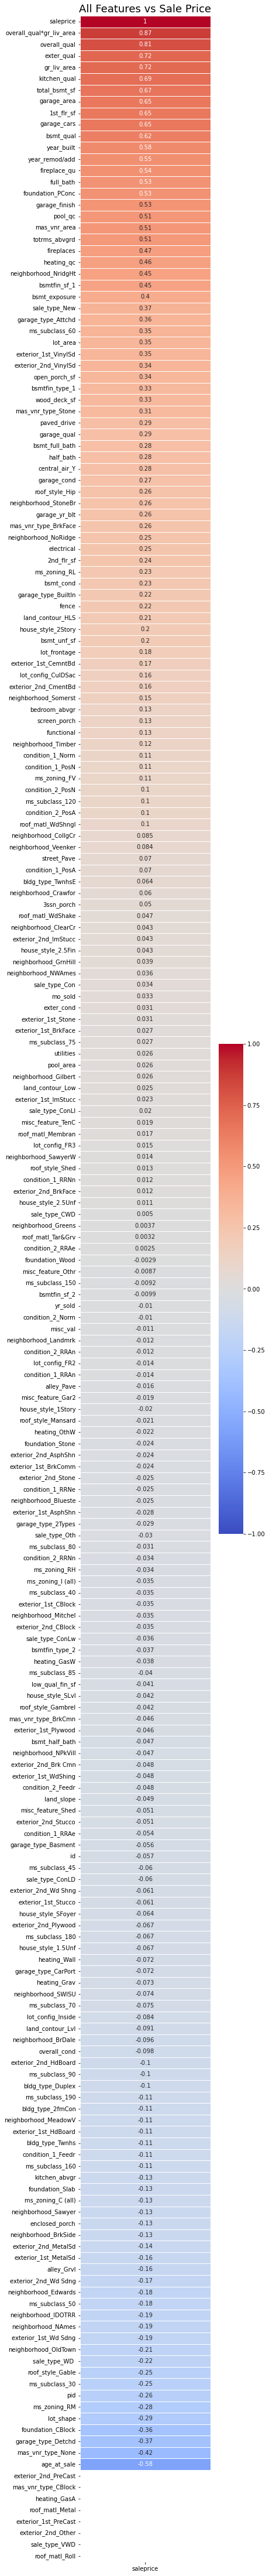

In [57]:
# Heatmap of features vs sales price in descending order
plt.figure(figsize = (5,80))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='coolwarm');
plt.title('All Features vs Sale Price', fontsize=18);

- `overall_qual*gr_liv_area` has the highest correlation to saleprice
- As most of the regression models we are using below use regularization to prevent overfitting, I have elected not to drop any features that have low or no correlation with `saleprice`

In [58]:
# Checking for null values once more
train.isnull().sum()[train.isnull().sum()>0]

bsmt_exposure       57
bsmtfin_type_1      54
bsmtfin_type_2      55
garage_finish      114
pool_qc           2032
fence             1642
dtype: int64

In [59]:
for col in train:
    if type(train[col]) =='int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')
train.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,exterior_2nd_PreCast,mas_vnr_type_CBlock,heating_GasA,roof_matl_Metal,exterior_1st_PreCast,exterior_2nd_Other,sale_type_VWD,roof_matl_Roll,age_at_sale,overall_qual*gr_liv_area
0,109,533352170,0.0,13517,3,4,3,6,8,1976,2005,289.0,4,3,3,3,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,1976.0,2.0,2.0,475.0,3,3,2,0,44,0,0,0,0,0.0,0.0,0,3,2010,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,

In [60]:
# Replacing null values in respective columns in the test dataaset
for col in test:
    if type(test[col]) == 'int64' or 'float64':
        test[col] = test[col].fillna(value=0)
    else:
        test[col] = test[col].fillna(value='None')
test.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Grvl,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,exterior_2nd_PreCast,mas_vnr_type_CBlock,heating_GasA,roof_matl_Metal,exterior_1st_PreCast,exterior_2nd_Other,sale_type_VWD,roof_matl_Roll,age_at_sale,overall_qual*gr_liv_area
0,2658,902301120,69.0,9142,4,4,3,6,8,1910,1950,0.0,3,2,2,3,1.0,1.0,0,1.0,0,1020,1020,4,2.0,908,1020,0,1928,0,0,2,0,4,2,2,9,7,0,0,1910.0,1.0,1,440,1,1,2,0,60,112,0,0,0,0.0,0.0,0,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [61]:
print(f'There are {train.isnull().sum().sum()} null values left in the train dataset.')
print(f'There are {test.isnull().sum().sum()} null values left in the test dataset.')

There are 0 null values left in the train dataset.
There are 0 null values left in the test dataset.


---
## 5. Modelling

### 5.1 Train-Test Split

In [62]:
print(train.shape)
print(test.shape)

(2040, 222)
(878, 221)


In [63]:
# Extracting feature columns from train
features = [col for col in train.columns if col != 'saleprice']
len(features)

221

In [64]:
# Assigning X (feature matrix) and Y (response vector)
X = train[features]
y = train['saleprice']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
#looking at the shapes of the training and test data
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print('')
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(2040, 221)
(1530, 221)
(510, 221)

(2040,)
(1530,)
(510,)


### 5.2 Scaling and Instantiating Models

In [67]:
# Scaling the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [68]:
# Instantiate Linear Regression
lr = LinearRegression()

In [69]:
# Instantiate Ridge
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [70]:
# Instantiate Lasso
lasso = LassoCV(n_alphas=200)

In [71]:
# Instantiate ElasticNet
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_model = ElasticNetCV(alphas=enet_alphas, cv=5)

### 5.3 Cross Validation

In [72]:
# Linear Regression
print("R2 of LR:", cross_val_score(lr, X_train, y_train, cv=5).mean())
print("RSME of LR:", -cross_val_score(lr, X_train, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

R2 of LR: 0.9061395559902061
RSME of LR: 24255.40350881836


In [73]:
# Ridge Regression
print("R2 of Ridge:", cross_val_score(ridge, X_train_sc, y_train, cv=5).mean())
print("RSME of Ridge:", -cross_val_score(ridge, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

R2 of Ridge: 0.9118380084906844
RSME of Ridge: 23525.39117079401


In [74]:
# Lasso Regression
print("R2 of Lasso:", cross_val_score(lasso, X_train_sc, y_train, cv=5).mean())
print("RSME of Lasso:", -cross_val_score(lasso, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

R2 of Lasso: 0.9178003274198305
RSME of Lasso: 22707.15030906116


In [75]:
# ElasticNet Regression
print("R2 of ElasticNet:", cross_val_score(enet_model, X_train_sc, y_train, cv=5).mean())
print("RSME of ElasticNet:", -cross_val_score(enet_model, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

R2 of ElasticNet: 0.9118812422352576
RSME of ElasticNet: 23579.74139367422


Both the R2 Scores and RSME of Lasso are the best compared to the other models. Ridge and ElasticNet gave almost the same scores, and Linear Regression was the worst overall.

### 5.4 Linear Regression

In [76]:
# Fitting LR instantiated model
lr.fit(X_train, y_train);

In [77]:
# Scoring fit model on training and testing set
print('Training R2 of LR: ', lr.score(X_train, y_train))
print('Testing R2 of LR: ', lr.score(X_test, y_test))

Training R2 of LR:  0.945305267521554
Testing R2 of LR:  0.9147157018854558


In [78]:
# RSME of model for training and testing set
print("Training RMSE of LR:", np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print("Testing RMSE of LR:", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Training RMSE of LR: 18667.61633128866
Testing RMSE of LR: 21999.830911093133


In [79]:
# Recapping cross-validation score and RSME from above
print("CV R2 of LR:", cross_val_score(lr, X_train, y_train, cv=5).mean())
print("CV RSME of LR:", -cross_val_score(lr, X_train, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

CV R2 of LR: 0.9061395559902061
CV RSME of LR: 24255.40350881836


The linear regression model has a high R2 score and low RSME on the training set, but the model seems to be overfit as there is a slight difference between the training and test scores and RSME.

### 5.5 Ridge Regression

In [80]:
# Fitting Ridge instantiated model
ridge.fit(X_train_sc, y_train);

In [81]:
# Scoring fit model on training and testing set
print('Training R2 of Ridge: ', ridge.score(X_train_sc, y_train))
print('Testing R2 of Ridge: ', ridge.score(X_test_sc, y_test))

Training R2 of Ridge:  0.9437463620140225
Testing R2 of Ridge:  0.9171930827484047


In [82]:
# RSME of model for training and testing set
print("Training RMSE of Ridge:", np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc))))
print("Testing RMSE of Ridge:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_sc))))

Training RMSE of Ridge: 18931.778829436247
Testing RMSE of Ridge: 21677.94507410957


In [83]:
# Recapping cross-validation score and RSME from above
print("CV R2 of Ridge:", cross_val_score(ridge, X_train_sc, y_train, cv=5).mean())
print("CV RSME of Ridge:", -cross_val_score(ridge, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

CV R2 of Ridge: 0.9118380084906844
CV RSME of Ridge: 23525.39117079401


The training R2 and RSME for Ridge are very similar to LR. Also seems to be overfit as there is a slight difference between the training and testing R2 + RSME. 

### 5.6 Lasso Regression

In [84]:
# Fitting Lasso instantiated model
lasso.fit(X_train_sc, y_train)

C:\Users\Jerv\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+09, tolerance: 9.748e+08
  model = cd_fast.enet_coordinate_descent(


LassoCV(n_alphas=200)

In [85]:
# Scoring fit model on training and testing set
print('Training R2 of Lasso: ', lasso.score(X_train_sc, y_train))
print('Testing R2 of Lasso: ', lasso.score(X_test_sc, y_test))

Training R2 of Lasso:  0.940662809761963
Testing R2 of Lasso:  0.9232400231068245


In [86]:
# RSME of model for training and testing set
print("Training RMSE of Lasso:", np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc))))
print("Testing RMSE of Lasso:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc))))

Training RMSE of Lasso: 19443.730994856876
Testing RMSE of Lasso: 20871.430726104194


In [87]:
# Recapping cross-validation score and RSME from above
print("CV R2 of Lasso:", cross_val_score(lasso, X_train_sc, y_train, cv=5).mean())
print("CV RSME of Lasso:", -cross_val_score(lasso, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

CV R2 of Lasso: 0.9178003274198305
CV RSME of Lasso: 22707.15030906116


The training R2 and RSME for Lasso are slightly worse than Ridge and LR, but the testing R2 and RSME are the best so far. This might be because Lasso's automated feature selection reduces overfitting more effectively.

### 5.7 ElasticNet Regression

In [88]:
# Fitting ElasticNet model
enet_model = enet_model.fit(X_train_sc, y_train)

In [89]:
# Scoring fit model on training and testing set
print('Training R2: ', enet_model.score(X_train_sc, y_train))
print('Testing R2: ', enet_model.score(X_test_sc, y_test))

Training R2:  0.9315752271346306
Testing R2:  0.9160285871755943


In [90]:
# RSME of model for training and testing set
print('Training RMSE of ElasticNet:', np.sqrt(mean_squared_error(y_train, enet_model.predict(X_train_sc))))
print('Testing RMSE of ElasticNet:', np.sqrt(mean_squared_error(y_test, enet_model.predict(X_test_sc))))

Training RMSE of ElasticNet: 20879.629950618444
Testing RMSE of ElasticNet: 21829.83902659769


In [91]:
enet_model.alpha_

0.5

In [92]:
# Recapping cross-validation score and RSME from above
print("CV R2 of ElasticNet:", cross_val_score(enet_model, X_train_sc, y_train, cv=5).mean())
print("CV RSME of ElasticNet:", -cross_val_score(enet_model, X_train_sc, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean())

CV R2 of ElasticNet: 0.9118812422352576
CV RSME of ElasticNet: 23579.74139367422


The training R2 and RSME for ElasticNet are worse than all the above models, and the testing R2 and RSME are similar to LR and Ridge.

### 5.8 Selecting Best Model

Lasso is the model of choice because:
- The Lasso training scores and RMSE are only slightly worse than both LR and Ridge, and its testing scores and RSME are the best out of all the models.
- It was also not as overfit due to its inbuilt automated feature selection

In [93]:
# Determining the number of feature that Lasso picked and excluded
coefs = pd.Series(lasso.coef_, index= X_train.columns)
print("Lasso picked", sum(coefs != 0),"features and zero-ed out the other",sum(coefs == 0),"features.")

Lasso picked 146 features and zero-ed out the other 75 features.


In [94]:
# Refitting model with whole training set
X_sc2 = ss.fit_transform(X)
lasso.fit(X_sc2, y)

lasso.score(X_sc2, y)

0.9386709020677423

In [95]:
# Scaling test dataset
testdf_sc = ss.transform(test)

# Creating new column for the predicted values
test['saleprice'] = lasso.predict(testdf_sc)

In [96]:
# Extracting dataset for submission on Kaggle
lasso_sub = test[['id','saleprice']]

print(lasso_sub.shape)
lasso_sub.head()

(878, 2)


,id,saleprice
0,2658,147459.616780
1,2718,152798.060610
2,2414,224148.778287
3,1989,105775.165917
4,625,173685.489143


In [97]:
# Exporting to csv file
lasso_sub.to_csv('../datasets/lasso.csv', index=False)

---
## 6. Conclusions and Recommendations

### 6.1 Key Takeaways

In [98]:
#Creating a dataframe for all of the lasso coefficients
lasso_coef = pd.DataFrame(lasso.coef_, columns=['coef'])
lasso_coef['name'] = X.columns
lasso_coef['abs_coef'] = np.abs(lasso_coef['coef'])
lasso_coef.sort_values(by = 'coef', ascending = False).head(10)

,coef,name,abs_coef
220,44809.124599,overall_qual*gr_liv_area,44809.124599
18,9390.544408,bsmtfin_sf_1,9390.544408
3,5511.786545,lot_area,5511.786545
107,5474.482565,neighborhood_NridgHt,5474.482565
8,5262.102623,overall_cond,5262.102623
22,4939.395979,total_bsmt_sf,4939.395979
113,4362.595277,neighborhood_StoneBr,4362.595277
11,4182.769047,mas_vnr_area,4182.769047
12,4111.851873,exter_qual,4111.851873
208,4090.384523,sale_type_New,4090.384523


In [99]:
#Top 10 lasso coefficients
top_coef = lasso_coef[['coef','name']].sort_values('coef',ascending = False)[:16]

#bottom 10 lasso coefficients
bottom_coef = lasso_coef[['coef', 'name']].sort_values('coef',ascending = False)[-4:]

#Concatenating the results
coef_list = pd.concat([top_coef,bottom_coef])

print(coef_list.shape)
coef_list.head()

(20, 2)


,coef,name
220,44809.124599,overall_qual*gr_liv_area
18,9390.544408,bsmtfin_sf_1
3,5511.786545,lot_area
107,5474.482565,neighborhood_NridgHt
8,5262.102623,overall_cond


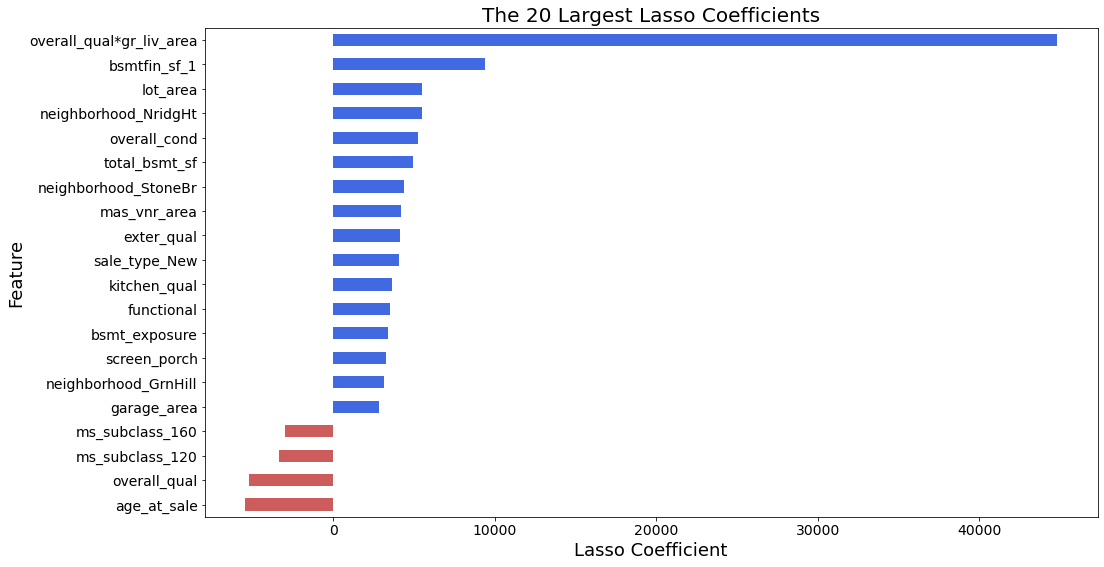

In [100]:
#Creating a chart to show the top/bottom 10 lasso coefficients.

coef_list.plot(kind = 'barh', x = 'name', y = 'coef', color = ['indianred' if c < 0 else 'royalblue' for c in coef_list['coef']], legend = False, figsize= (16,9))
plt.xlabel('Lasso Coefficient', size = 18)
plt.ylabel('Feature', size = 18)
plt.title('The 20 Largest Lasso Coefficients', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.gca().invert_yaxis();

- `overall_qual*gr_living_area` is the strongest predictor of `saleprice`
- Most positive features are related to the size and quality of the house
- Houses in neighborhoods such as Northridge Heights, Stone Brook and Green Hills, tend to have higher `saleprice`


### 6.2 Recommendations

1. Features to highlight and downplay
- To highlight: House size, quality of the house and neighbourhood the house is located in 
- To downplay: Age and poor quality of the house  

2. Features to prioritise for refurbishment to maximise sale price
- The materials used to build the house have a stronger effect on Sale Price than the condition of the materials
- With a given budget for refurbishment, it is better to focus on material quality than condition

3. Neighborhoods to prospect for houses to sell 
- Houses are more expensive in certain neighborhoods like Northridge Heights, Stone Brook and Green Hills.
- Agents can focus on these neighborhoods to maximise commission.

4. Agents can use this model to predict prices objectively prior to client negotiation  


Overall, the model we created is very useful for prediciting home prices in Ames, Iowa. Other cities in the US would require additional data and analysis.

Moving forward, we should utilise more data from recent years as this dataset is 12 years and older and might not apply to the current housing market.

---